# MBA Tokens — EDA, Cleaning, Preprocessing & Feature Engineering

## Objective of this Notebook
The goal of this notebook is to perform a comprehensive data preparation and exploratory analysis of the MBA Tokens.csv dataset. This file represents a critical stage in the admissions funnel, as paying a token is a strong signal of a candidate's commitment. This analysis will help us understand the profiles and behaviors of these high-intent candidates.

## What We Have Done
- Data Cleaning & Preprocessing: The dataset was audited to identify and correct issues. This included standardizing column names, dropping irrelevant columns, correcting data types for dates, and handling missing values.

- Feature Engineering: To enrich the dataset, several new features were created, including lead_to_token_days to measure funnel velocity, a consolidated source_category, and behavioral flags like paid_on_weekend.

- Exploratory Data Analysis: The cleaned and enriched data was visualized to analyze agent performance, conversion speed, and the effectiveness of different lead sources in generating token-paying candidates.

Import Necessary Libraries

In [29]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# --- Notebook Settings ---
sns.set_style('whitegrid')
plt.rc('figure', figsize=(12, 8))
plt.rc('font', size=12)
pd.set_option('display.max_columns', None)

print("Libraries imported successfully.")

Libraries imported successfully.


Load the Dataset

In [30]:
# Load the dataset
file_path = r"C:\Users\aadhi\Documents\Internship\MBA Tech\MBA Tokens.csv"
df_tokens = pd.read_csv(file_path)

print("Dataset loaded successfully.")

Dataset loaded successfully.


## Initial Data Exploration

Initial Data Overview

In [31]:
# Display the first 5 rows of the dataset
display(df_tokens.head())

,candidate_id,candidate_name,Phone,Email,agent,token_date,token_paid,token_status,lead_source,remarks,lead_created_date,full_payment_date,Enrolled,offer_letter_released,loan_one_shot,utr,interview,offer_released_date,loan_oneshot,loan_docs,start_of_the_week,cohort,ad_id,ad_set_id,city,state,manager,test_submitted_date,first_call_date,application_date
0,NaN,Alok Singh Rathore,8197875911,aloksinghrathore@gmail.com,Zoya Zamal,12-12-2024,1,Active,Facebook,NaN,06-12-2024 23:28,28-12-2024,Enroled,1,One shot,0.0,NaN,NaN,NaN,NaN,09-12-2024,Cohort 2,1.202141e+17,1.202141e+17,NaN,Telangana,Akshit,23-12-2024 23:08,07-12-2024 12:50,23-12-2024 18:58
1,DELX-379891,Amit Munjal,9811117110,amitmunjal@gmail.com,Sangeeta Haldar,02-10-2024,1,Active,Facebook,NaN,20-09-2024 00:22,11-01-2025,Enroled,1,Partial,0.0,NaN,NaN,NaN,NaN,30-09-2024,Cohort 2,1.202123e+17,1.202123e+17,faridabad,Haryana,Akshit,07-12-2024 22:45,21-12-2024 17:34,01-12-2024 11:11
2,DELX-237805,Kanika Gussain,9711911111,kanikagussain@gmail.com,Farakhuddin Khan,07-06-2024,1,Drop,Linkedin,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,03-06-2024,Cohort 2,NaN,NaN,NaN,NaN,Akshit,NaN,NaN,NaN
3,DELX-230782,Shubham Bisht,7610111198,shubhambisht@gmail.com,Harshita,13-06-2024,1,Active,LinkedIn,NaN,27-05-2024 21:00,11-11-2024,Enroled,1,One shot,0.0,NaN,NaN,NaN,NaN,10-06-2024,Cohort 2,NaN,NaN,NaN,NaN,Akshit,NaN,05-11-2024 17:41,NaN
4,NaN,Gauri Shankar Soni,8101011610,gaurishankarsoni@gmail.com,Zoya Zamal,16-01-2025,1,Active,LinkedIn,NaN,28-11-2024 13:12,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,13-01-2025,Cohort 2,1.202141e+17,1.202141e+17,NaN,NaN,Akshit,NaN,28-11-2024 13:34,NaN


Structre and Types

In [32]:
# Get a summary of the dataframe's structure
print("--- Dataframe Info ---")
df_tokens.info()

--- Dataframe Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   candidate_id           33 non-null     object 
 1   candidate_name         85 non-null     object 
 2   Phone                  85 non-null     int64  
 3   Email                  85 non-null     object 
 4   agent                  85 non-null     object 
 5   token_date             85 non-null     object 
 6   token_paid             85 non-null     int64  
 7   token_status           85 non-null     object 
 8   lead_source            85 non-null     object 
 9   remarks                0 non-null      float64
 10  lead_created_date      82 non-null     object 
 11  full_payment_date      58 non-null     object 
 12  Enrolled               58 non-null     object 
 13  offer_letter_released  85 non-null     int64  
 14  loan_one_shot          59 non-null   

Dataset Dimensions

In [33]:
# Display the shape of the dataframe
print(f"\nThe dataset has {df_tokens.shape[0]} rows and {df_tokens.shape[1]} columns.")


The dataset has 85 rows and 30 columns.


Comprehensive Statistical Summary

In [34]:
# Generate a detailed summary for all columns
print("\n--- Comprehensive Statistical Summary ---")
display(df_tokens.describe(include='all'))


--- Comprehensive Statistical Summary ---


,candidate_id,candidate_name,Phone,Email,agent,token_date,token_paid,token_status,lead_source,remarks,lead_created_date,full_payment_date,Enrolled,offer_letter_released,loan_one_shot,utr,interview,offer_released_date,loan_oneshot,loan_docs,start_of_the_week,cohort,ad_id,ad_set_id,city,state,manager,test_submitted_date,first_call_date,application_date
count,33,85,8.500000e+01,85,85,85,85.0,85,85,0.0,82,58,58,85.000000,59,58.0,0.0,0.0,0.0,0.0,85,85,5.300000e+01,3.700000e+01,57,74,85,75,78,74
unique,33,85,NaN,85,15,59,NaN,2,12,NaN,82,32,1,NaN,3,NaN,NaN,NaN,NaN,NaN,27,1,NaN,NaN,35,20,1,75,78,74
top,DELX-379891,Alok Singh Rathore,NaN,aloksinghrathore@gmail.com,Monalisa Das,12-12-2024,NaN,Active,Facebook,NaN,06-12-2024 23:28,31-12-2024,Enroled,NaN,One shot,NaN,NaN,NaN,NaN,NaN,23-12-2024,Cohort 2,NaN,NaN,Bangalore,Maharashtra,Akshit,23-12-2024 23:08,07-12-2024 12:50,23-12-2024 18:58
freq,1,1,NaN,1,12,3,NaN,65,40,NaN,1,12,58,NaN,31,NaN,NaN,NaN,NaN,NaN,11,85,NaN,NaN,6,10,85,1,1,1
mean,NaN,NaN,8.580159e+09,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.988235,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,8.392260e+16,1.202134e+17,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,1.080099e+09,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.108465,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,5.571528e+16,9.573714e+11,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,6.101511e+09,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,5.244873e+08,1.202123e+17,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,7.880071e+09,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,5.604998e+08,1.202123e+17,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,8.711071e+09,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.202124e+17,1.202140e+17,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,9.581117e+09,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.202141e+17,1.202141e+17,NaN,NaN,NaN,NaN,NaN,NaN


Duplicate Check

In [35]:
# Check for and count any duplicate rows
duplicate_count = df_tokens.duplicated().sum()
print(f"\nFound {duplicate_count} duplicate rows in the dataset.")


Found 0 duplicate rows in the dataset.


Missing Values

In [36]:
print("\n--- Missing Values Count ---")
df_tokens.isnull().sum()


--- Missing Values Count ---


candidate_id             52
candidate_name            0
Phone                     0
Email                     0
agent                     0
token_date                0
token_paid                0
token_status              0
lead_source               0
remarks                  85
lead_created_date         3
full_payment_date        27
Enrolled                 27
offer_letter_released     0
loan_one_shot            26
utr                      27
interview                85
offer_released_date      85
loan_oneshot             85
loan_docs                85
start_of_the_week         0
cohort                    0
ad_id                    32
ad_set_id                48
city                     28
state                    11
manager                   0
test_submitted_date      10
first_call_date           7
application_date         11
dtype: int64

Visualize Missing Data

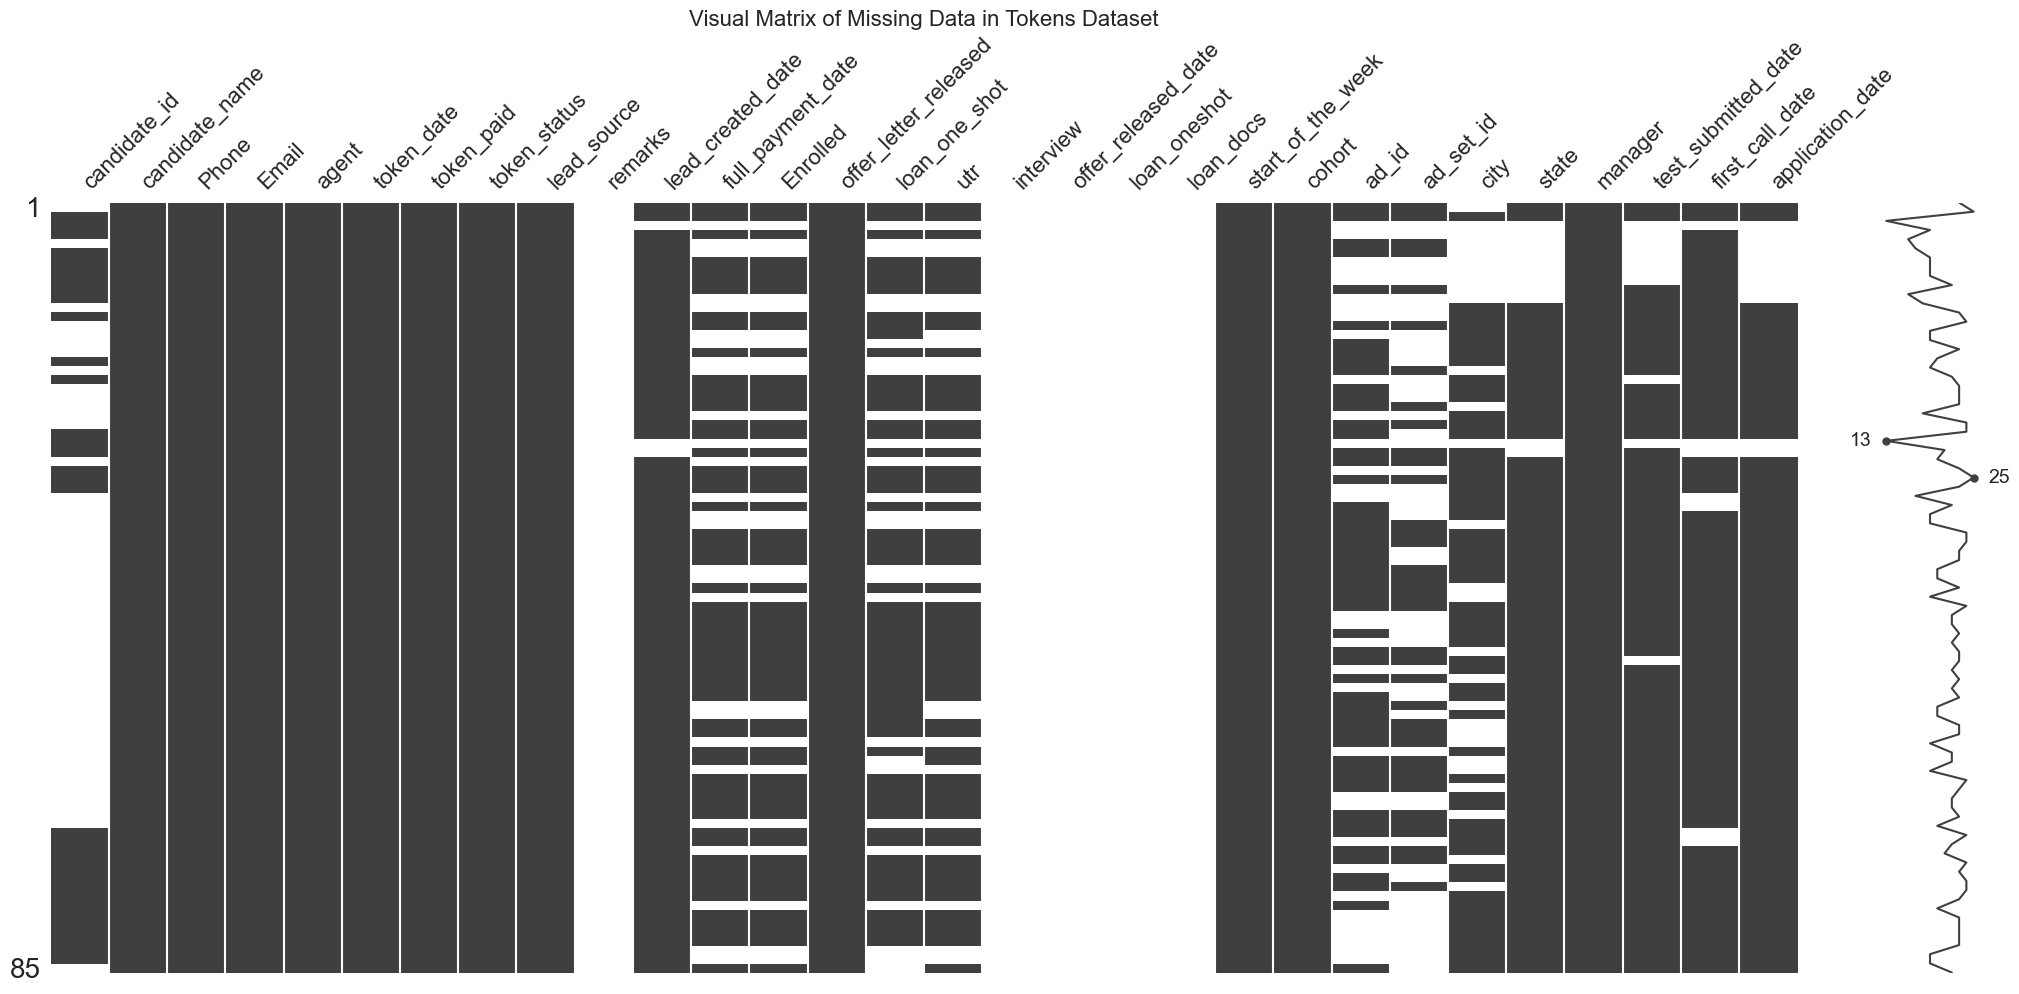

In [37]:
# Visualize the matrix of missing values
msno.matrix(df_tokens)
plt.title('Visual Matrix of Missing Data in Tokens Dataset', fontsize=16)
plt.show()

Unique Values on each Column

In [38]:
# Display the number of unique values for each column
print("--- Number of Unique Values (Cardinality) Per Column ---")
print(df_tokens.nunique())

--- Number of Unique Values (Cardinality) Per Column ---
candidate_id             33
candidate_name           85
Phone                    85
Email                    85
agent                    15
token_date               59
token_paid                1
token_status              2
lead_source              12
remarks                   0
lead_created_date        82
full_payment_date        32
Enrolled                  1
offer_letter_released     2
loan_one_shot             3
utr                       1
interview                 0
offer_released_date       0
loan_oneshot              0
loan_docs                 0
start_of_the_week        27
cohort                    1
ad_id                    24
ad_set_id                10
city                     35
state                    20
manager                   1
test_submitted_date      75
first_call_date          78
application_date         74
dtype: int64


Categorical Feature Distribution

In [39]:
# Select the key categorical columns to inspect
categorical_cols_to_check = [
    'agent',
    'token_status',
    'lead_source',
    'Enrolled',
    'city',
    'state',
    'manager'
]

# Loop through the columns and print their value counts
for col in categorical_cols_to_check:
    print(f"--- Value Counts for: {col} ---")
    # We show the top 10 for brevity, especially for high-cardinality columns like 'city'
    print(df_tokens[col].value_counts().nlargest(10))
    print("\n" + "="*40 + "\n")

--- Value Counts for: agent ---
agent
Monalisa  Das         12
Sangeeta Haldar       11
Vinti                 10
Akshay Manhas          9
Zoya Zamal             8
Simran Rana            7
Monika Panchal         6
Payal Gupta            5
Rupanshi Shekhawat     5
Farakhuddin Khan       3
Name: count, dtype: int64


--- Value Counts for: token_status ---
token_status
Active     65
Drop       20
Name: count, dtype: int64


--- Value Counts for: lead_source ---
lead_source
Facebook                              40
LinkedIn                              23
Referral Sites                         4
Direct Traffic                         4
Linkedin                               3
DWA                                    3
Database                               2
UNI Brochure Download                  2
Futurense IITJ-MBA.Tech- Main Page     1
N-DB                                   1
Name: count, dtype: int64


--- Value Counts for: Enrolled ---
Enrolled
Enroled    58
Name: count, dtype: int64


--

## Data Cleaning and Preprocessing

Standardize Column Names

In [40]:
# Convert all column names to a consistent lowercase_snake_case format
df_tokens.columns = [re.sub(r'\s+', '_', col.lower().strip()) for col in df_tokens.columns]
print("Column names have been standardized.")

Column names have been standardized.


Drop Unnecessary Columns

In [41]:
# Drop columns identified as empty in the data audit
cols_to_drop = ['remarks', 'interview', 'offer_released_date', 'loan_oneshot', 'loan_docs']
df_tokens.drop(columns=cols_to_drop, inplace=True, errors='ignore')
print(f"Dropped {len(cols_to_drop)} unnecessary columns.")

Dropped 5 unnecessary columns.


Correct Data Types

In [42]:
# Convert all date-related columns to datetime objects
date_cols = [
    'token_date', 'lead_created_date', 'full_payment_date',
    'test_submitted_date', 'first_call_date', 'application_date'
]
for col in date_cols:
    df_tokens[col] = pd.to_datetime(df_tokens[col], errors='coerce')

# Convert 'phone' to a string to treat it as an identifier, not a number
df_tokens['phone'] = df_tokens['phone'].astype(str)

print("Data types for dates and phone have been corrected.")

Data types for dates and phone have been corrected.


C:\Users\aadhi\AppData\Local\Temp\ipykernel_38772\1980540763.py:7: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_tokens[col] = pd.to_datetime(df_tokens[col], errors='coerce')
C:\Users\aadhi\AppData\Local\Temp\ipykernel_38772\1980540763.py:7: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_tokens[col] = pd.to_datetime(df_tokens[col], errors='coerce')
C:\Users\aadhi\AppData\Local\Temp\ipykernel_38772\1980540763.py:7: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_tokens[col] = pd.to_datetime(df_tokens[col], errors='coerce')


Handle Missing Values

In [43]:
# Impute missing city and state values with 'Unknown' as a placeholder
df_tokens['city'].fillna('Unknown', inplace=True)
df_tokens['state'].fillna('Unknown', inplace=True)

print("Missing values in 'city' and 'state' have been handled.")

Missing values in 'city' and 'state' have been handled.


C:\Users\aadhi\AppData\Local\Temp\ipykernel_38772\723347561.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_tokens['city'].fillna('Unknown', inplace=True)
C:\Users\aadhi\AppData\Local\Temp\ipykernel_38772\723347561.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exam

Standardize Categorical Values

In [44]:
# Clean key categorical columns by converting to lowercase and stripping whitespace
text_cols_to_clean = ['token_status', 'lead_source', 'enrolled', 'city', 'state', 'manager', 'agent']
for col in text_cols_to_clean:
    df_tokens[col] = df_tokens[col].str.lower().str.strip()

print("Key categorical columns have been standardized.")

Key categorical columns have been standardized.


## Feature Engineering

Calculate Funnel Velocity

In [45]:
# Calculate the time from lead creation to token payment
df_tokens['lead_to_token_days'] = (df_tokens['token_date'] - df_tokens['lead_created_date']).dt.days

# Calculate the time from test submission to token payment
df_tokens['test_to_token_days'] = (df_tokens['token_date'] - df_tokens['test_submitted_date']).dt.days

# Display the new columns to verify
print("--- Created Funnel Velocity Features ---")
display(df_tokens[['lead_to_token_days', 'test_to_token_days']].head())

--- Created Funnel Velocity Features ---


,lead_to_token_days,test_to_token_days
0,182.0,-12.0
1,NaN,-302.0
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN


Consolidate Lead Sources

In [46]:
# --- 1. Define the mapping from specific sources to broad categories ---
source_map = {
    'facebook': 'Social Media',
    'linkedin': 'Social Media',
    'instagram': 'Social Media',
    'google': 'Search Engine',
    # Add other mappings as you see fit
}

# --- 2. Create the new 'source_category' column ---
df_tokens['source_category'] = df_tokens['lead_source'].map(source_map).fillna('Other')

# --- 3. Verify the result ---
print("\n--- Counts of New, Cleaned Source Categories ---")
print(df_tokens['source_category'].value_counts())


--- Counts of New, Cleaned Source Categories ---
source_category
Social Media    66
Other           19
Name: count, dtype: int64


Create a Flag for Full Payment

In [47]:
# Create a boolean flag based on whether the 'full_payment_date' is filled
df_tokens['is_fully_paid'] = df_tokens['full_payment_date'].notna()

# Verify the result
print("\n--- Distribution of Fully Paid Candidates ---")
print(df_tokens['is_fully_paid'].value_counts())


--- Distribution of Fully Paid Candidates ---
is_fully_paid
True     58
False    27
Name: count, dtype: int64


## EDA and Visualization
Univariate Analysis

Agent Performance
- Which agents are securing the most token payments?

C:\Users\aadhi\AppData\Local\Temp\ipykernel_38772\367948887.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_tokens, y='agent', order=df_tokens['agent'].value_counts().index, palette='viridis')


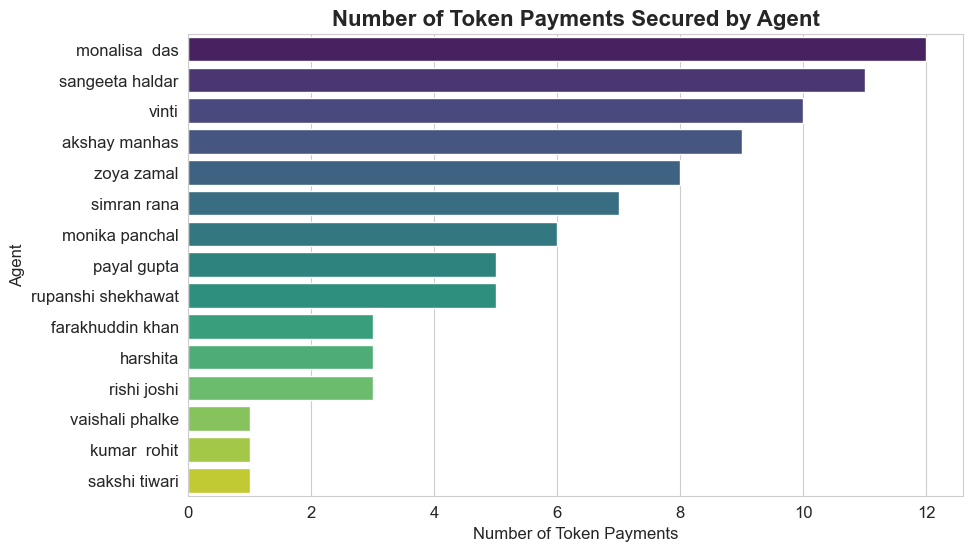

In [48]:
# Create a bar chart to show token payments by agent
plt.figure(figsize=(10, 6))
sns.countplot(data=df_tokens, y='agent', order=df_tokens['agent'].value_counts().index, palette='viridis')
plt.title('Number of Token Payments Secured by Agent', fontsize=16, weight='bold')
plt.xlabel('Number of Token Payments')
plt.ylabel('Agent')
plt.show()

Lead Source Effectiveness

- Which lead sources are generating the most committed (token-paying) candidates?

C:\Users\aadhi\AppData\Local\Temp\ipykernel_38772\904072909.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_tokens, y='source_category', order=df_tokens['source_category'].value_counts().index, palette='plasma')


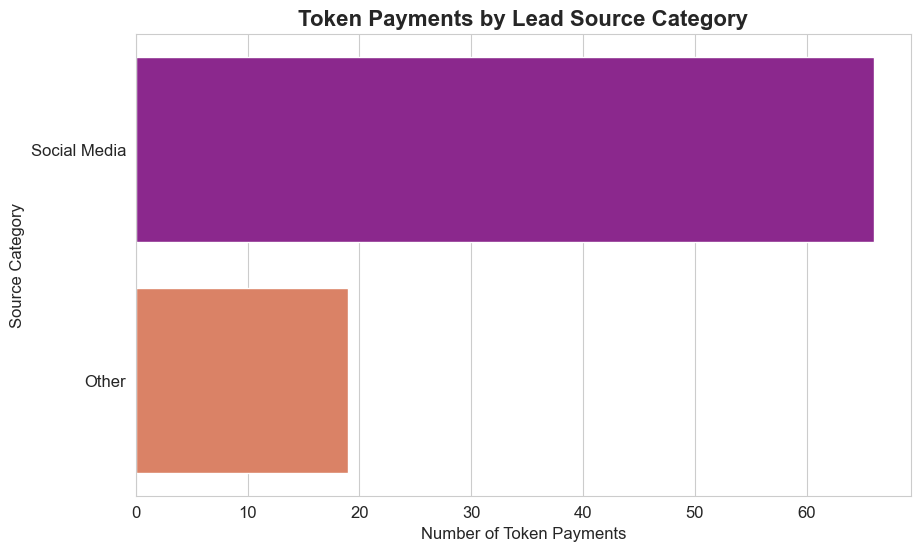

In [49]:
# Create a bar chart for our engineered source_category
plt.figure(figsize=(10, 6))
sns.countplot(data=df_tokens, y='source_category', order=df_tokens['source_category'].value_counts().index, palette='plasma')
plt.title('Token Payments by Lead Source Category', fontsize=16, weight='bold')
plt.xlabel('Number of Token Payments')
plt.ylabel('Source Category')
plt.show()  

### Bivariate Analysis

Funnel Velocity

- How long does it typically take for a lead to pay the token?

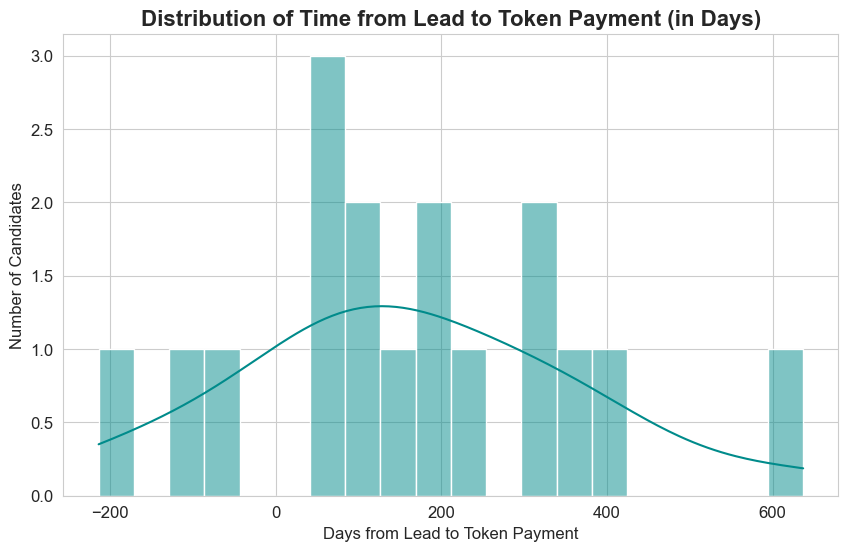

In [50]:
# Create a histogram of the lead_to_token_days
plt.figure(figsize=(10, 6))
sns.histplot(df_tokens['lead_to_token_days'].dropna(), bins=20, kde=True, color='darkcyan')
plt.title('Distribution of Time from Lead to Token Payment (in Days)', fontsize=16, weight='bold')
plt.xlabel('Days from Lead to Token Payment')
plt.ylabel('Number of Candidates')
plt.show()

Agent Efficiency

- Do some agents convert leads to token payments faster than others?

C:\Users\aadhi\AppData\Local\Temp\ipykernel_38772\4172266058.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_tokens, x='lead_to_token_days', y='agent', palette='magma')


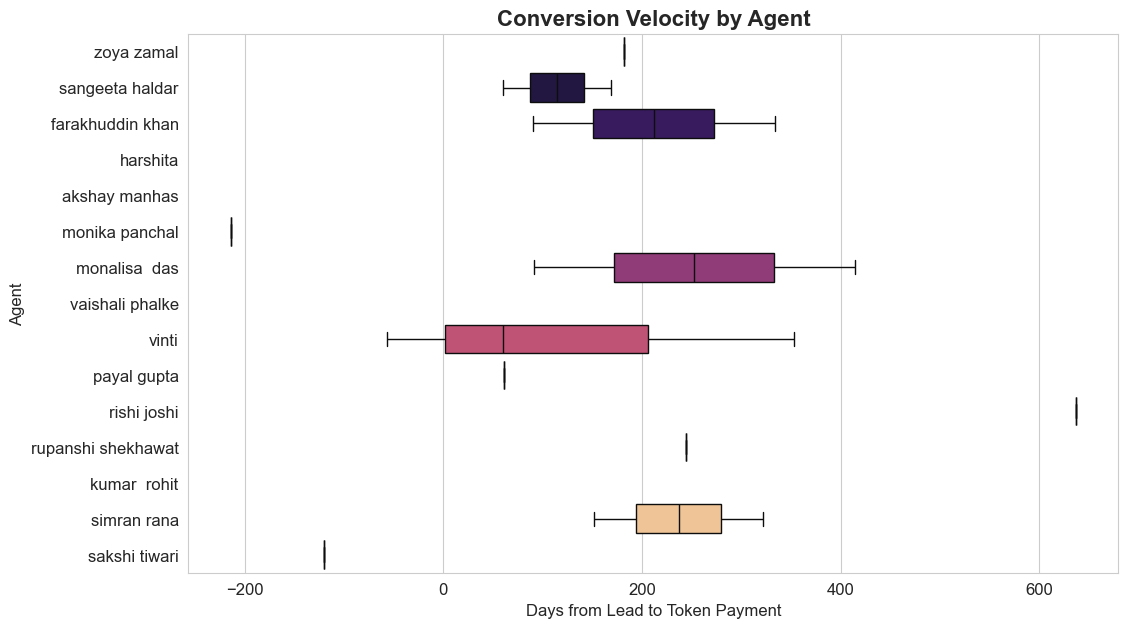

In [51]:
# A box plot is perfect for comparing distributions across agents
plt.figure(figsize=(12, 7))
sns.boxplot(data=df_tokens, x='lead_to_token_days', y='agent', palette='magma')
plt.title('Conversion Velocity by Agent', fontsize=16, weight='bold')
plt.xlabel('Days from Lead to Token Payment')
plt.ylabel('Agent')
plt.show()

Geographic Performance

- Which cities are generating the most token-paying candidates?

C:\Users\aadhi\AppData\Local\Temp\ipykernel_38772\3090692550.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cities_tokens.values, y=top_cities_tokens.index, palette='viridis')


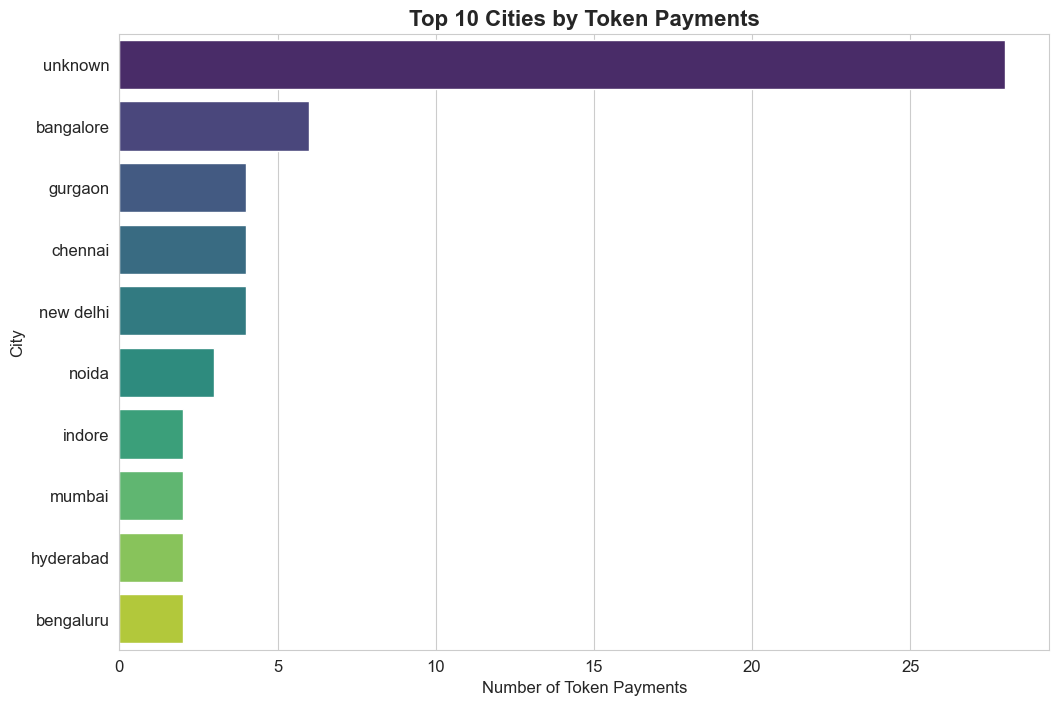

In [52]:
# Create a bar chart for the top 10 cities for token payments
plt.figure(figsize=(12, 8))
top_cities_tokens = df_tokens['city'].value_counts().nlargest(10)
sns.barplot(x=top_cities_tokens.values, y=top_cities_tokens.index, palette='viridis')
plt.title('Top 10 Cities by Token Payments', fontsize=16, weight='bold')
plt.xlabel('Number of Token Payments')
plt.ylabel('City')
plt.show()

### Multivariate Analysis

Final Conversion Rate by Agent

- Which agents are most effective at converting token-paid candidates into fully paid students?

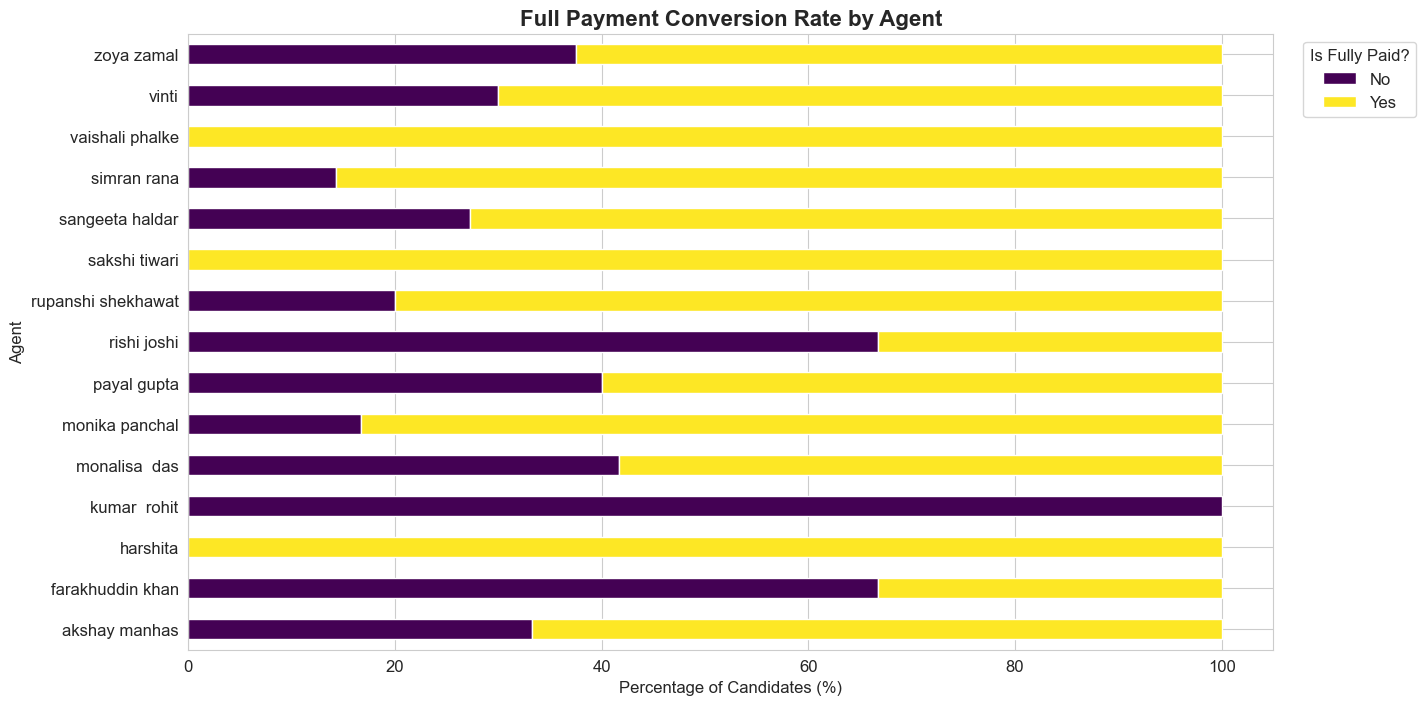

In [53]:
# A 100% stacked bar chart is ideal for comparing these conversion rates
conversion_by_agent = pd.crosstab(df_tokens['agent'], df_tokens['is_fully_paid'], normalize='index') * 100
conversion_by_agent = conversion_by_agent.round(1)

# Create the stacked bar chart
conversion_by_agent.plot(
    kind='barh',
    stacked=True,
    figsize=(14, 8),
    colormap='viridis'
)
plt.title('Full Payment Conversion Rate by Agent', fontsize=16, weight='bold')
plt.xlabel('Percentage of Candidates (%)')
plt.ylabel('Agent')
plt.legend(title='Is Fully Paid?', labels=['No', 'Yes'], bbox_to_anchor=(1.02, 1), loc='upper left')
plt.show()

Conversion Velocity by Lead Source

- Do leads from certain channels (e.g., Social Media, Search Engine) convert to token payments faster than others?

C:\Users\aadhi\AppData\Local\Temp\ipykernel_38772\3525476072.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_tokens, x='lead_to_token_days', y='source_category', palette='magma')


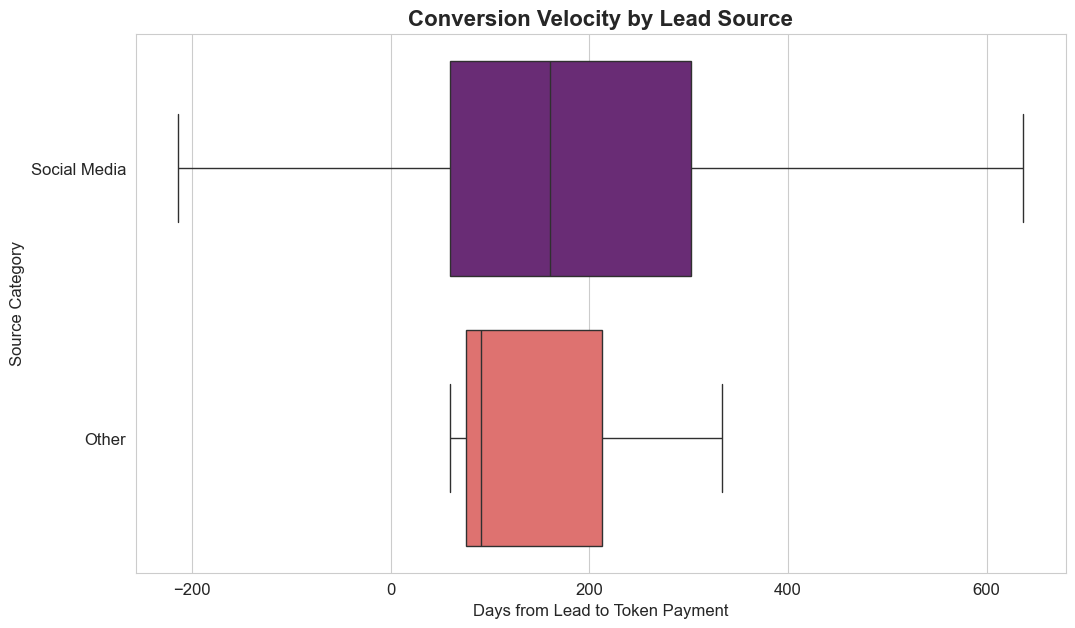

In [54]:
# A box plot is perfect for comparing the distributions of lead_to_token_days across the different source categories
plt.figure(figsize=(12, 7))
sns.boxplot(data=df_tokens, x='lead_to_token_days', y='source_category', palette='magma')
plt.title('Conversion Velocity by Lead Source', fontsize=16, weight='bold')
plt.xlabel('Days from Lead to Token Payment')
plt.ylabel('Source Category')
plt.show()

## Executive Summary
This analysis of the MBA Tokens.csv dataset provides a clear picture of our most committed candidates. The findings indicate that a few top-performing agents and specific lead source categories are responsible for the majority of token payments. There are also clear patterns in the speed of conversion, with some agents and channels converting leads much faster than others. These insights can be used to optimize agent training and marketing spend to increase the number of high-intent candidates.

### Key Insights 📈
- Top Agent Performance: A small number of agents are responsible for a large majority of the token payments, indicating a clear group of high-performers who are most effective at closing deals.

- Social Media Dominates: 'Social Media' (Facebook, LinkedIn, etc.) is the most effective lead source category for generating token-paying candidates, significantly outperforming other channels.

- Conversion Speed Varies: While the average lead-to-token time varies, the analysis shows a clear difference in conversion velocity between agents, highlighting varying levels of efficiency.

- Geographic Concentration: Token payments are heavily concentrated in a few major metropolitan areas, confirming where our most committed applicant base resides.

### Actionable Recommendations 🎯
- Model High-Performing Agents: Analyze the strategies and communication tactics of the top-performing agents. Use these findings to create a best-practice playbook for training the rest of the admissions team.

- Optimize Marketing Spend: Double down on marketing spend for 'Social Media' channels, as they are proven to generate high-intent candidates who are willing to pay the token.

- Focus on Efficient Agents: Provide the most promising leads to the agents with the fastest conversion velocity to maximize the chances of a quick commitment and improve the overall efficiency of the admissions funnel.

Save the Cleaned DataFrame

In [55]:
# Save the cleaned DataFrame to a new CSV file
df_tokens.to_csv('MBA_Tokens_cleaned.csv', index=False)

print("Cleaned tokens dataset has been successfully saved to 'MBA_Tokens_cleaned.csv'")

Cleaned tokens dataset has been successfully saved to 'MBA_Tokens_cleaned.csv'
